<a href="https://colab.research.google.com/github/taraliu23/Urban-Data-Science/blob/main/GSV_CV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Data Science Lecture Week 13

## Computer Vision for Urban Planning

 🚌🚶‍♀️Google Street View (GSV) and Computer Vision 🖥️ 👀

### Quantifying and Mapping Atlanta MARTA Stops' Popularity

🔔 **Question**: A quick question to help you understand better.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the lab!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
📖 **Documentation**: Links to official documentation or additional reading materials to deepen your understanding.<br>




### 📖 **Documentation**: Google Street View Use Cases in Urban Data Science

[Leveraging 31 Million Google Street View Images to Characterize Built Environments and Examine County Health Outcomes](https://pmc.ncbi.nlm.nih.gov/articles/PMC8093841/)

[Using deep learning and Google Street View to estimate the demographic makeup of neighborhoods across the United States](https://www.pnas.org/doi/10.1073/pnas.1700035114)



### Getting Started

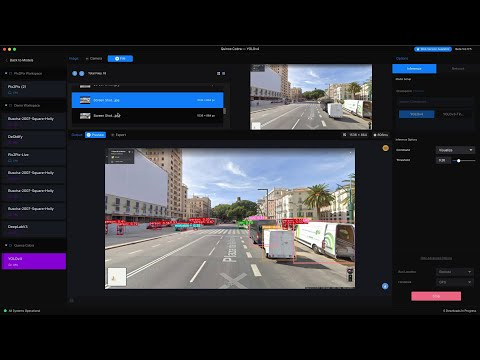

In [ ]:
# let's get started!
# <- click on the ▶️ button to run this cell

from IPython.display import YouTubeVideo
from IPython.display import Image

YouTubeVideo('QYbEDOrgPu0',allow_autoplay=True, width=600)

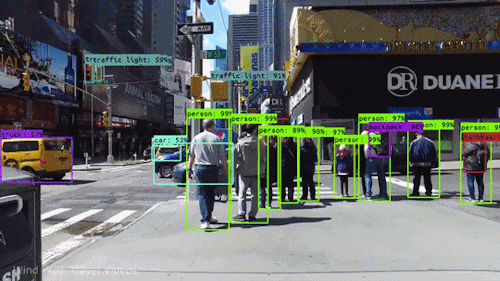

In [ ]:
# You don't need to run the cells that are commented out. They are for embedding picutures only :)
# Image('/content/yolo5.gif', width=400)

## Crash Course: Deep Learning, Computer Vision, and Their Applications in Urban Data Science



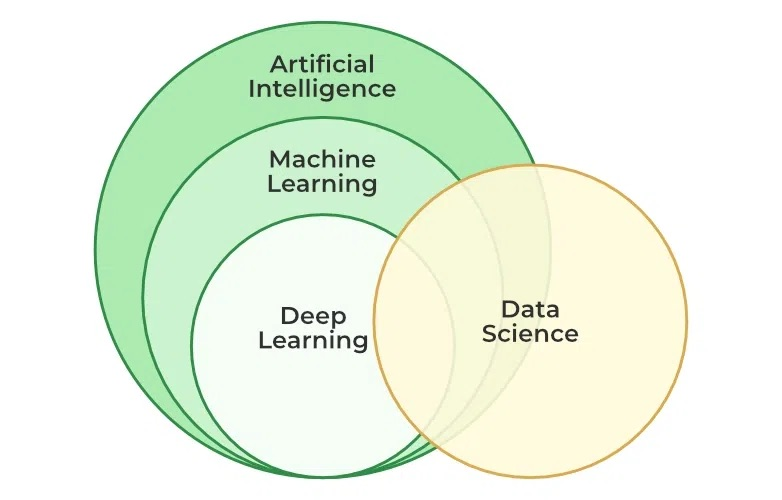

In [ ]:
# Image('/content/Maachine-Learning.jpeg', width=400)
# A Venn Diagram of Machine Learning and Deep Learning [6]

### 🔔 **Question**: What is Deep Learning?

Deep learning is an artificial intelligence (AI) method that teaches computers to process data in a way **inspired by the human brain 🧠**.

Deep learning models can recognize complex pictures, text, sounds, and other data patterns to produce accurate insights and predictions.

You can use deep learning methods to automate tasks that typically require human intelligence, such as describing images or transcribing a sound file into text [5].

📖 **Documentation**: [[Read the Deep Learning Book]](https://www.deeplearningbook.org/)



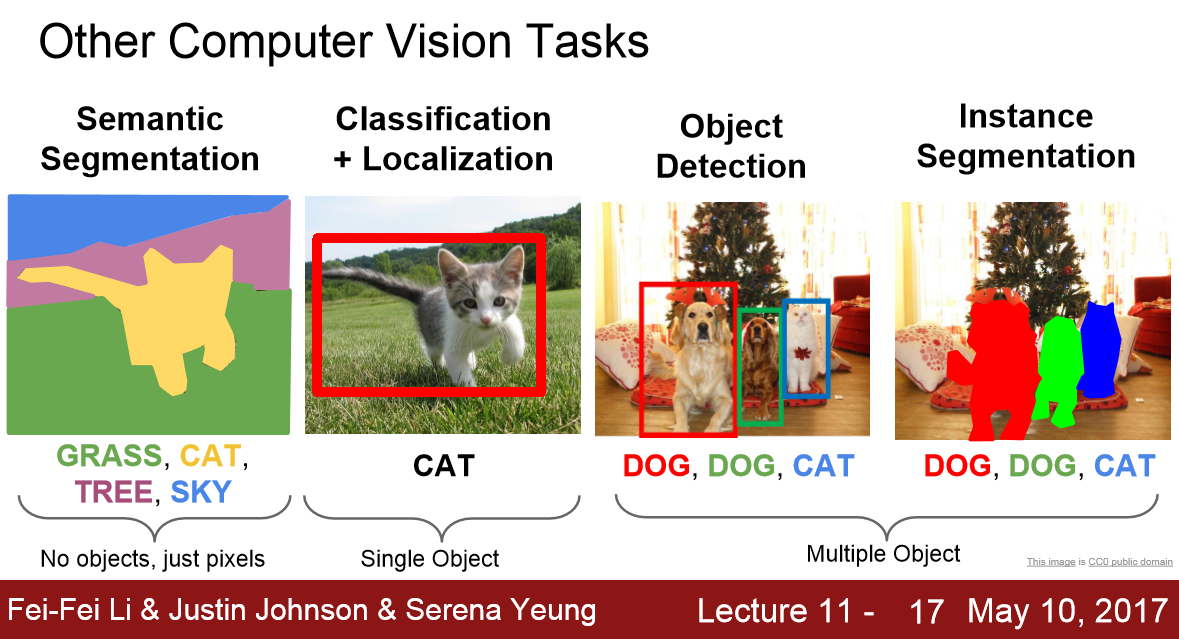

In [ ]:
# Image('/content/computer-vision-task.png', width=400)
# Coputer Vision Tasks [3]



🔔 **Question**: What are the tasks in computer vision?

- Semantic Segmentation: Assigning a label to every pixel in an image.

- Image Classification: Assigning a label to an entire image.

- Object Detection: Identifying and localizing objects within an image.

- Instance Segmentation: Combining object detection and semantic segmentation.

📖 **Documentation**:
[[Learn more about Computer Vision!]](https://www.geeksforgeeks.org/computer-vision/?ref=shm)


## 🔔 **Question**: What are the use cases of computer vision in urban planning?

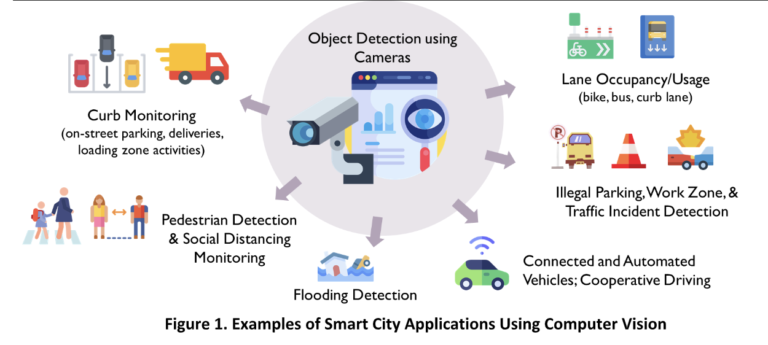

In [ ]:
# Image('/content/cv-urban.png', width=400)
# Computer Vision Use Cases in Urban Data Science [2]

📖 **Documentation**: [[More Ideas]](https://www.cogentinfo.com/resources/the-most-valuable-computer-vision-smart-city-applications-2023-guide)

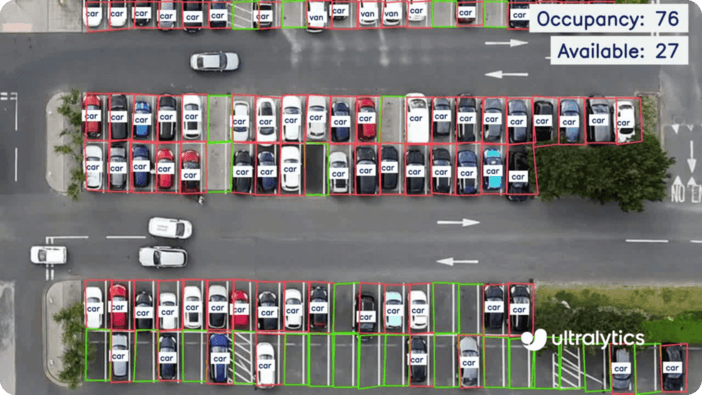

In [ ]:
# Image('/content/usecase-parking-lot.png', width=400)
# For example, Parking Occupancy and Illegal Parking Detection [10]

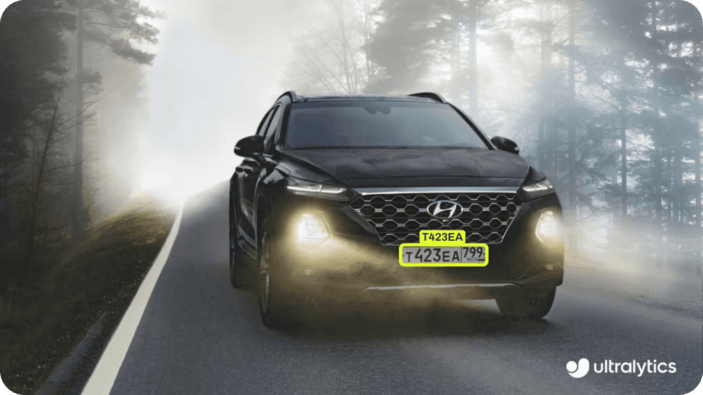

In [ ]:
# Image('/content/usecase-license-plate.png', width=400)
# Licence Plate Detection [10]

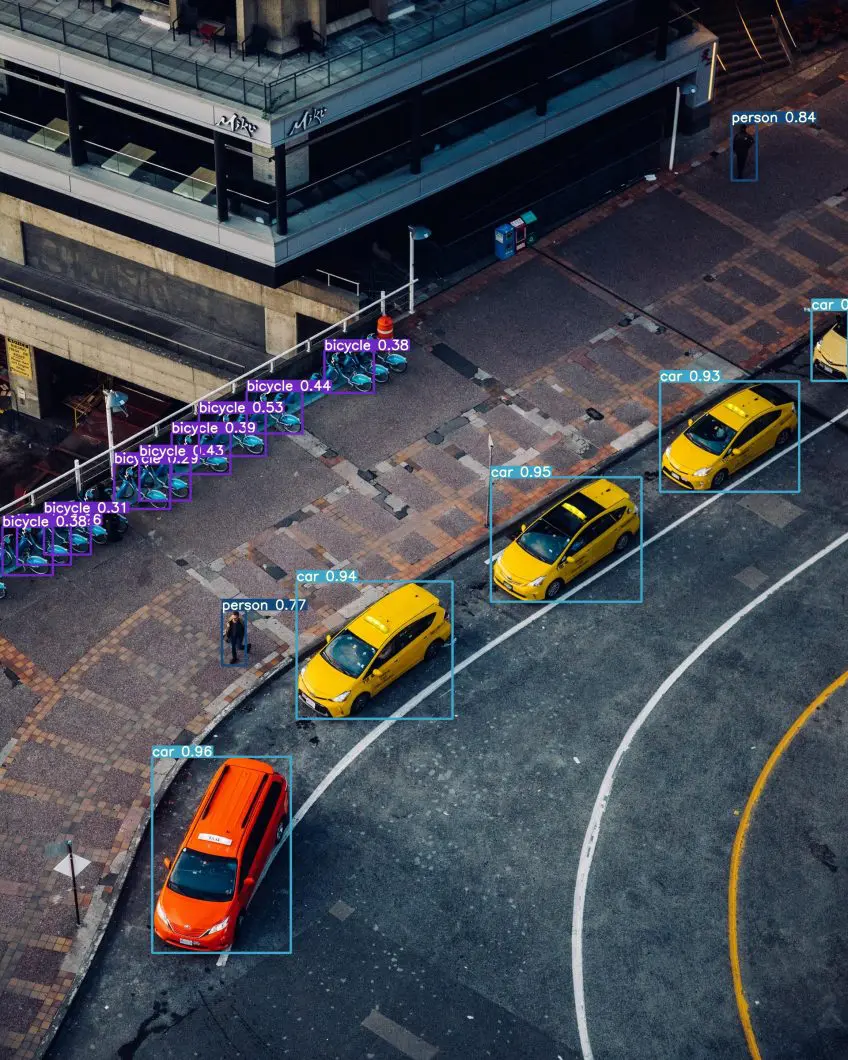

In [ ]:
# Image('/content/usecase-dangerous-situation.jpg', width=400)
# Object Detection using YOLOv7 in Smart Cities to recognize dangerous situations [11]


### Context: Street View Imagery(SVI) and Google Street View(GSV)

We will use the abbrevation "SVI" and "GSV" for Street View Imagery and Google Street View below!

#### SVI 🖼

Street view imagery (SVI) has gained prominence in urban studies through increased data coverage, improved machine learning, and enhanced computing capabilities. Covering half the world's population, SVI enables virtual audits to replace field visits [9].

#### GSV 🌳 🚶
Google Street View (GSV) is the leading SVI service provider. Images are captured via car-mounted cameras and sensors, with occasional use of backpack cameras for narrow spaces. Launched in 2007, GSV now covers over 90 countries and some indoor locations, providing 360-degree views from public roads, landmarks, and special locations like the International Space Station.[9]

#### Fun fact about GSV 😆

- Google attempts to take fresh Street View images in major cities once a year. In less populated areas, new images should be expected every three years.

- The new cars are all Hyundai Elantra GTs. The cars mostly end up being blue and brown, which is a lot more subtle than the old Google Maps-themed Street View cars and their big green doors[4].

📖 **Documentation**: [[Learn More about How GSV works!]](https://www.google.com/streetview/how-it-works/)

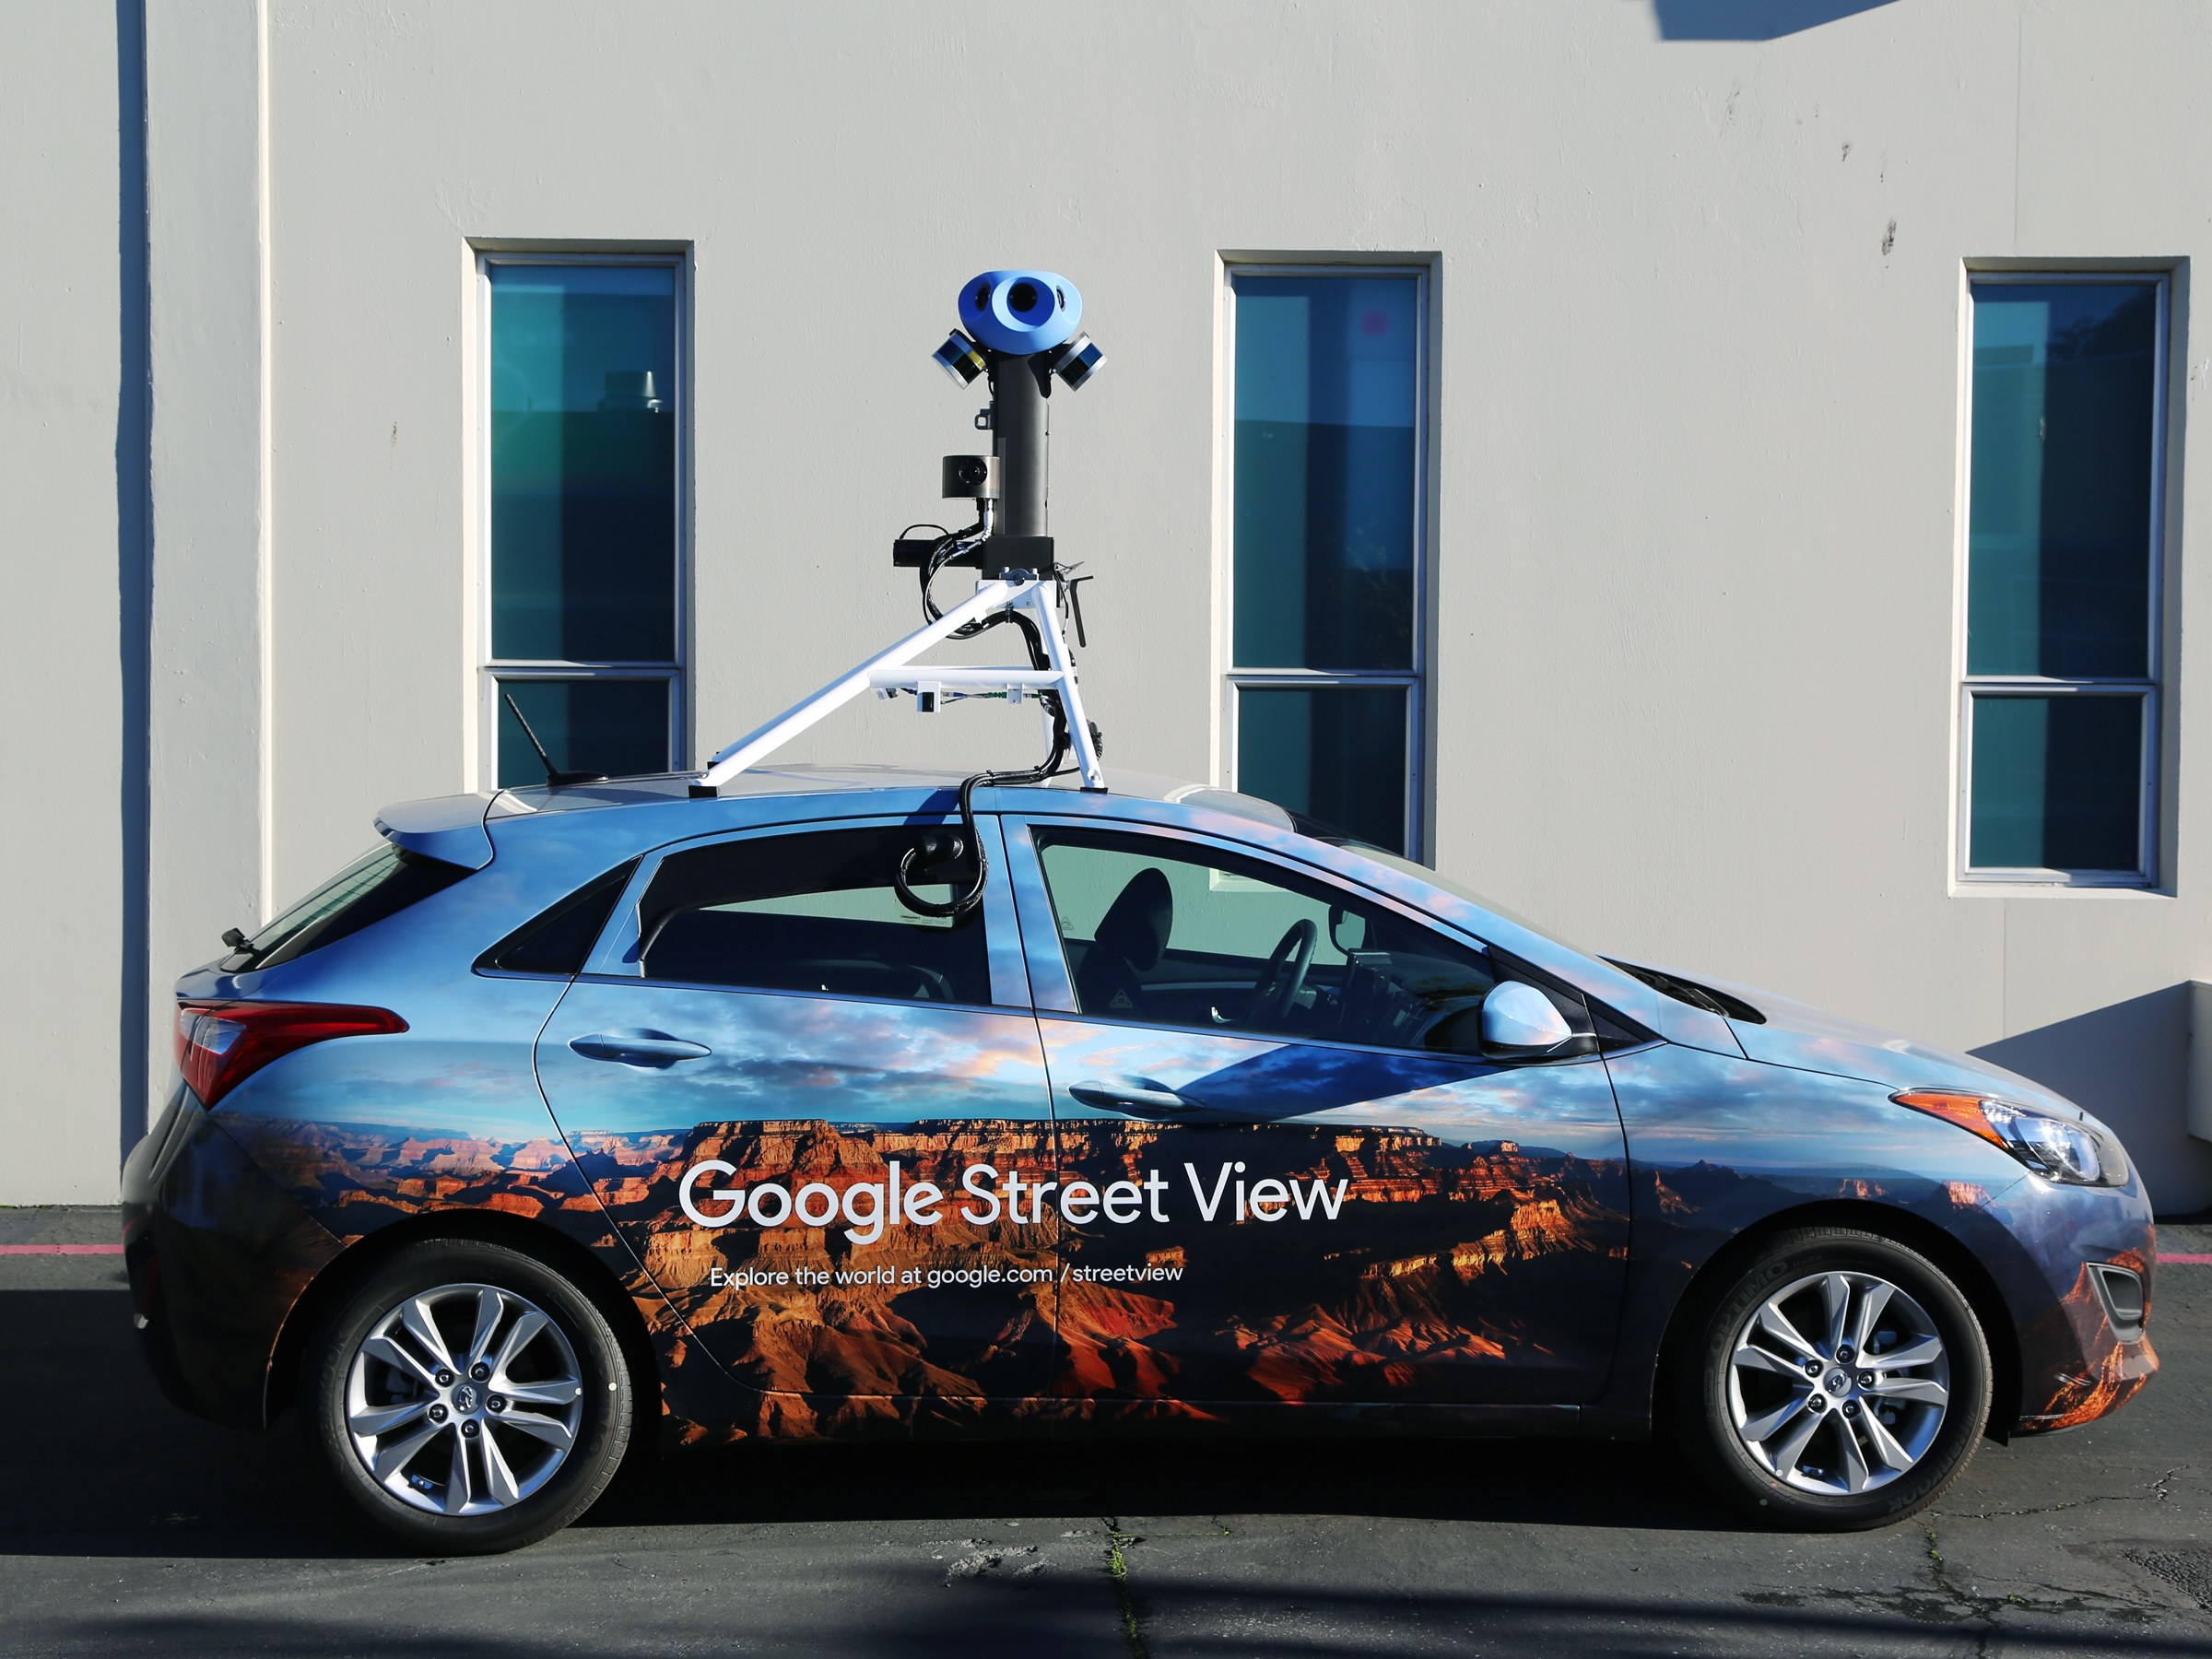

In [ ]:
# Image('/content/googlestreetview.jpg', width=400)
# A Google Street View Car

#### Other SVI providers

📖 **Documentation**: [Mapillary](https://www.mapillary.com/datasets)

📖 **Documentation**: [KartaView](https://kartaview.org/map/@33.7769,-84.3921,13z)

Mapillary and KartaView (until November 2020 known as OpenStreetCam) are the remaining two services with a global focus. They both rely on crowdsourced imagery and are owned and operated by commercial entities.




### 🥊 **Challenge**: Popularity Analysis with Instance Segmentation Model YOLO v8


💡 **Tip**:

YOLO = **Y**ou **O**nly **L**ook **O**nce Moldel

It's a popular object detection algorithm known for speed and accuracy.


In [ ]:
! pip --quiet install \
google_streetview \
opencv-python \
keras-segmentation \
pandas \
geopandas \
numpy \
matplotlib \
folium \
tqdm \
ultralytics

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.2 MB/s eta 0:00:00


In [ ]:
import cv2                      # OpenCV(cv2) library, widely used for computer vision tasks such as image processing, object detection, and video analysis.
import torch                    # PyTorch library, a popular deep learning framework for building & training neural networks
from PIL import Image           # Pillow(PL) library for image manipulation,

import pandas as pd
import json
from ultralytics import YOLO    # YOLO (You Only Look Once) is a popular object detection algorithm known for its speed and accuracy!
import os                       # to manipulate file and navigate directory, in our batching process

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# if you use pre-downloaded dataset:
# drag gsv_images.zip to the left panel - Files
# unzip files

!unzip /content/gsv_images.zip -d /content/gsv_images


Archive:  /content/gsv_images.zip
replace /content/gsv_images/content/gsv_images/image_205/metadata.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gsv_images/content/gsv_images/image_205/metadata.json  
replace /content/gsv_images/content/gsv_images/image_205/gsv_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/gsv_images/content/gsv_images/image_205/gsv_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

🥊 **Challenge**: Take an image and use a computer vision model YOLOv8 to identify objects within that image.

In [ ]:
# this function uses computer vision to analyze the street view images!
# Don't worry if you can't catch up / understand all,
# the result file has been in our folder!

def analyze_image(image_path, model):
    """
    Performs instance segmentation on a given image using YOLOv8.

    Args:
        image_path (str): Path to the image file.
        model (YOLO): The loaded YOLOv8 model.

    Returns:
        pandas.DataFrame: A DataFrame containing inference results, including location, label, and metadata.
                         Returns None if the image file or metadata file is not found.
    """
    try: # Error Handling
        # Image analysis core function (aka Inference)
        results = model.predict(source=image_path,
                                save=True,              # save annotated image
                                imgsz=640,              # set image size for processing
                                conf=0.5                # set confidence threshold
                                                        # only objects detected with at least 50% confidence will be included
                                )

        # Extract metadata from the metadata.json file in the same directory
        metadata_file = os.path.join(os.path.dirname(image_path),
                                     "metadata.json")   # finds the JSON file in the same directory as the image

        #  loads metadata(coordinates, etc.) into the metadata variable
        with open(metadata_file, "r") as f:
            metadata = json.load(f)

        # Create an empty list to store analysis result
        inference_data = []

        # Iterate through each detection result from YOLOv8
        for result in results:                          # for each detected objects
            boxes = result.boxes
            for box in boxes:
                label = result.names[int(box.cls)]      # extract object's label (e.g., "car," "person")
                confidence = box.conf.item()            # confidence score(how confident the mdoel believe its a car/person/traffic light)
                x1, y1, x2, y2 = box.xyxy[0].tolist()   # bounding box coordinates (x1, y1, x2, y2)

                inference_data.append({                 # information is stored in a list, inference_data.
                    "label": label,
                    "confidence": confidence,
                    "x1": x1,
                    "y1": y1,
                    "x2": x2,
                    "y2": y2,
                    "metadata": metadata
                })

        df = pd.DataFrame(inference_data)               # convert list to pandas DataFrame (df)

        return df                                       # if everything's good, return the DataFrame

    # Error Handling (continued)                        # if error occurs, print error type and message
    except FileNotFoundError:                           # print an error message if file not found
        print(f"Error: Image or metadata file not found at {image_path}")
        return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None



🥊 **Challenge**: Load and prepare the YOLOv8 model for object detection.

In [ ]:
model = YOLO('yolov8n-seg.pt')

# model = ..: model variable is assigned the YOLOv8 model instance

# YOLO(): Core component for running YOLOv8 model, model class from the ultralytics library
# 'yolov8n-seg.pt': the specific pre-trained YOLOv8 model file.
    # It's essentially the brain of the model, containing all the learned information needed for object detection.



💡 **Tip**: In the rest of the notebook, whenever you see something like `model.predict()`, it means you're using this loaded YOLOv8 model to analyze images and identify objects within them.

In [ ]:
# test function

path = '/content/gsv_images/content/gsv_images/image_1/gsv_0.jpg'
df = analyze_image(path,model)

# great! this works


image 1/1 /content/gsv_images/content/gsv_images/image_1/gsv_0.jpg: 640x640 1 car, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


In [ ]:
# Now, let's batch processing all street view images
# This is a helper function,
# it organize and prepare street view image data for batching (apply the computer vision analsyis for each images)

def process_subfolders(root_dir, num_folders=10):
  """
  Processes the first 'num_folders' subfolders within 'root_dir'.

  Args:
      root_dir: The root directory containing the subfolders.
      num_folders: The number of subfolders to process.

  Returns:
      A pandas DataFrame containing data from processed subfolders,
      or None if an error occurs.
  """

  all_data = []                                                 # create an empty list called all_data to store information about the images
  subfolders = [f.path for f in os.scandir(root_dir) if f.is_dir()] # find all the subfolders within the root_dir

  for i, folder in enumerate(subfolders[:num_folders]):         # loop iterates through the specified number of subfolders
      try:                                                      # try-except handle potential errors during processing

          for filename in os.listdir(folder):                   # goes through each file within the current subfolde
              if filename.endswith('.jpg'):                     # If it's a JPEG, creates the full path to the image file
                image_path = os.path.join(folder, filename)

                all_data.append({                               # add a dictionary containing information about the image (subfolder, filename, and path) to the all_data list
                    'subfolder': os.path.basename(folder),
                    'image_file': filename,
                    'image_path': image_path
                })

      except Exception as e:                                    # If any error occurs, this block catches the error and prints an error message
          print(f"Error processing subfolder {folder}: {e}")

  return pd.DataFrame(all_data)


In [ ]:
root_directory = '/content/gsv_images/content/gsv_images'
final_df = process_subfolders(root_directory, num_folders=60)

if final_df is not None:
    final_df

In [ ]:
results.to_csv('results.csv', index=False)

In [ ]:
results

label  confidence          x1          y1          x2  \
0               car    0.932570  126.625946  335.024048  289.579193   
1               car    0.685419  266.512695  328.511292  320.713074   
2               car    0.801924  575.717834  332.515045  617.984070   
3               car    0.752523  337.927032  320.009064  361.200714   
4               car    0.669446  172.885468  330.759216  243.435150   
...             ...         ...         ...         ...         ...   
2094  traffic light    0.830764  331.764435  213.644470  345.207123   
2095  traffic light    0.784800   26.176939  244.732559   44.263550   
2096            car    0.523273  145.463104  333.932800  177.010742   
2097            car    0.931818  134.814423  350.191589  382.993866   
2098            car    0.789256  546.851074  318.680115  575.010742   

              y2                                           metadata  
0     421.219238  [{'copyright': '© Google', 'date': '2021-12', ...  
1     362.298035  [{'copyright': '© Google', 'date': '2021-12', ...  
2     355.878448  [{'copyright': '© Google', 'date': '2024-12', ...  
3     331.479156  [{'copyright': '© Google', 'date': '2024-12', ...  
4     374.897034  [{'copyright': '© Google', 'date': '2024-12', ...  
...          ...                                                ...  
2094  244.266846  [{'copyright': '© Google', 'date': '2022-02', ...  
2095  270.687012  [{'copyright': '© Google', 'date': '2022-02', ...  
2096  356.019531  [{'copyright': '© Google', 'date': '2022-02', ...  
2097  520.752869  [{'copyright': '© Google', 'date': '2024-07', ...  
2098  338.156799  [{'copyright': '© Google', 'date': '2024-07', ...  

[2099 rows x 7 columns]

In [ ]:
results = pd.read_csv('/content/results.csv')

results


label  confidence          x1          y1          x2  \
0               car    0.932570  126.625946  335.024048  289.579193   
1               car    0.685419  266.512695  328.511292  320.713074   
2               car    0.801924  575.717834  332.515045  617.984070   
3               car    0.752523  337.927032  320.009064  361.200714   
4               car    0.669446  172.885468  330.759216  243.435150   
...             ...         ...         ...         ...         ...   
2094  traffic light    0.830764  331.764435  213.644470  345.207123   
2095  traffic light    0.784800   26.176939  244.732559   44.263550   
2096            car    0.523273  145.463104  333.932800  177.010742   
2097            car    0.931818  134.814423  350.191589  382.993866   
2098            car    0.789256  546.851074  318.680115  575.010742   

              y2                                           metadata  
0     421.219238  [{'copyright': '© Google', 'date': '2021-12', ...  
1     362.298035  [{'copyright': '© Google', 'date': '2021-12', ...  
2     355.878448  [{'copyright': '© Google', 'date': '2024-12', ...  
3     331.479156  [{'copyright': '© Google', 'date': '2024-12', ...  
4     374.897034  [{'copyright': '© Google', 'date': '2024-12', ...  
...          ...                                                ...  
2094  244.266846  [{'copyright': '© Google', 'date': '2022-02', ...  
2095  270.687012  [{'copyright': '© Google', 'date': '2022-02', ...  
2096  356.019531  [{'copyright': '© Google', 'date': '2022-02', ...  
2097  520.752869  [{'copyright': '© Google', 'date': '2024-07', ...  
2098  338.156799  [{'copyright': '© Google', 'date': '2024-07', ...  

[2099 rows x 7 columns]

In [ ]:
# extract street image date and location from metadata column

df['metadata'] = df['metadata'].apply(lambda x: x[0])
df['date'] = df['metadata'].apply(lambda x: x.get('date'))
df['lat'] = df['metadata'].apply(lambda x: x.get('location').get('lat'))
df['lon'] = df['metadata'].apply(lambda x: x.get('location').get('lng'))

In [ ]:
df.to_csv('results_new.csv', index=False)

🥊 **Challenge**: Mapping Spatial Distribution of Popularity

In [ ]:
import folium
from matplotlib import cm
from matplotlib.colors import to_hex
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
df = pd.read_csv('/content/results_new.csv')
df.head(5)

label  confidence          x1          y1          x2          y2  \
0   car    0.932570  126.625946  335.024048  289.579193  421.219238   
1   car    0.685419  266.512695  328.511292  320.713074  362.298035   
2   car    0.801924  575.717834  332.515045  617.984070  355.878448   
3   car    0.752523  337.927032  320.009064  361.200714  331.479156   
4   car    0.669446  172.885468  330.759216  243.435150  374.897034   

                                            metadata     date        lat  \
0  {'copyright': '© Google', 'date': '2021-12', '...  2021-12  34.039232   
1  {'copyright': '© Google', 'date': '2021-12', '...  2021-12  34.039232   
2  {'copyright': '© Google', 'date': '2024-12', '...  2024-12  33.905024   
3  {'copyright': '© Google', 'date': '2024-12', '...  2024-12  33.905024   
4  {'copyright': '© Google', 'date': '2024-12', '...  2024-12  33.905024   

         lon  
0 -84.305770  
1 -84.305770  
2 -84.254483  
3 -84.254483  
4 -84.254483

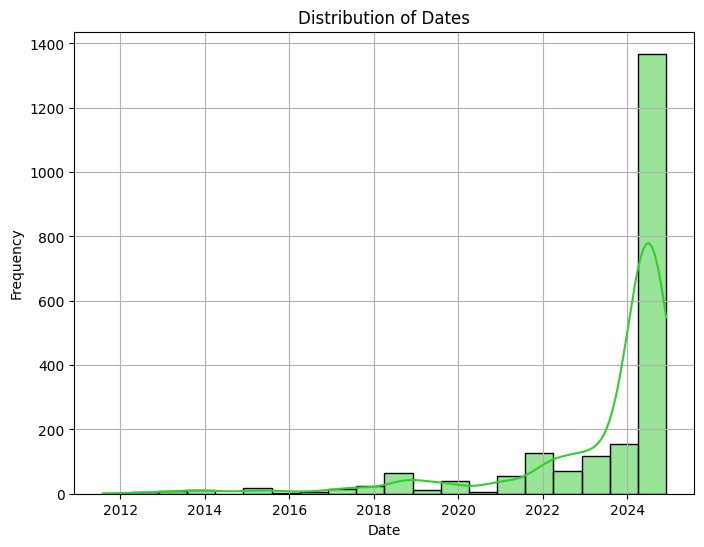

Number of observations before 2020-01-01: 198
Number of observations after 2020-01-02: 1901


In [ ]:
# Sentence starting with 📊 shows the aim for the according plot

# 📊 Understanding the frequency of images taken at different times
# 📊 Making sure to exclude outdated images

df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(8, 6))

sns.histplot(df['date'], bins=20, kde=True, color='limegreen')
# kde is kernel density estimate to smooth the histogram
# providing complementary information about the shape of the distribution
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.grid(True)
plt.show()


before_2020 = df[df['date'] < '2020-01-01']
num_before = len(before_2020)
print(f"Number of observations before 2020-01-01: {num_before}")

after_2020 = df[df['date'] > '2020-01-02']
num_after = len(after_2020)
print(f"Number of observations after 2020-01-02: {num_after}")

In [ ]:
# Drop rows with dates before 2020-01-01
df = df[df['date'] >= '2020-01-01']

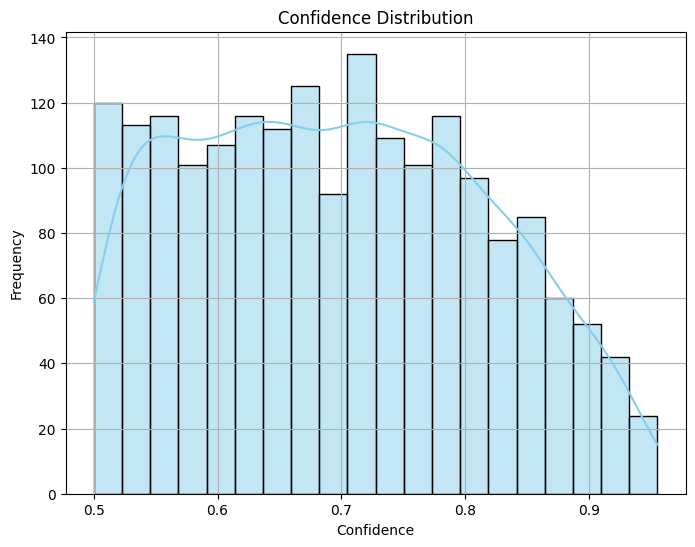

In [ ]:
# 📊 Understanding how confident the model is in its predictions.


plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True, color='skyblue')
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# plt.save('label_confidence_distribution.png',dpi=400)

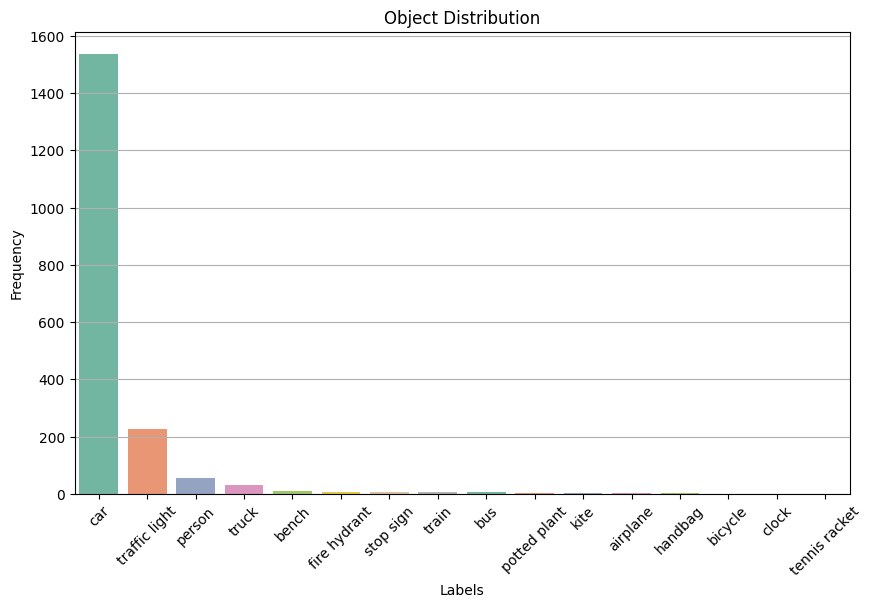

In [ ]:
# Understanding which objects are most common detected

# calculates how often each object appears

label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values,
            orient='v',
            hue=label_counts.index, palette='Set2')
plt.title('Object Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# plt.savefig('object_distribution.png', dpi=400)

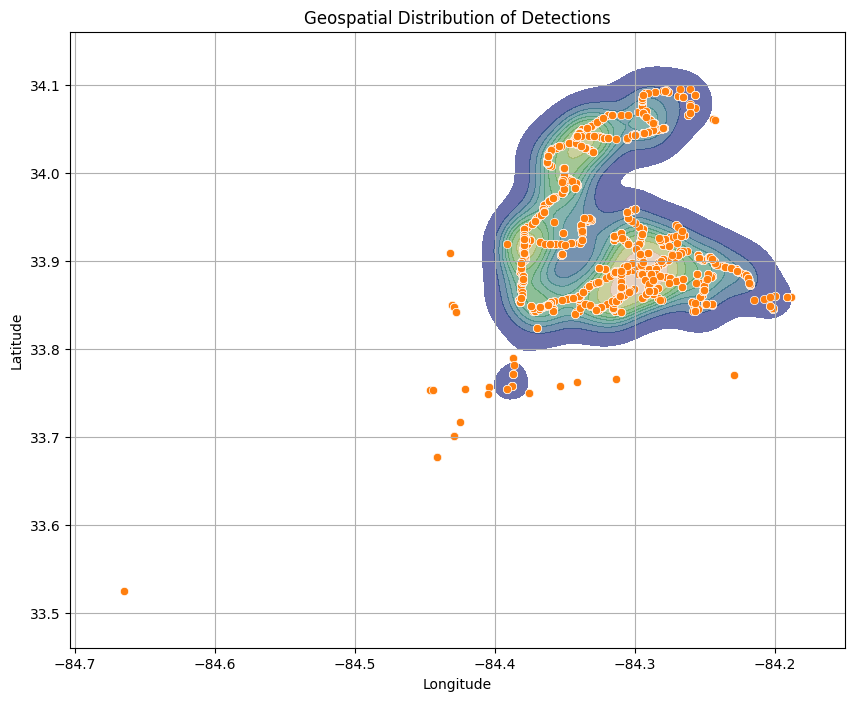

In [ ]:
# Scatter plot of geospatial data

plt.figure(figsize=(10, 8))
# plt.scatter(df['lon'], df['lat'], c=df['confidence'], cmap='viridis', alpha=0.7)
sns.kdeplot(x=df['lon'], y=df['lat'], cmap='gist_earth', fill=True, alpha=0.6)
sns.scatterplot(x=df['lon'], y=df['lat'])

plt.title('Geospatial Distribution of Detections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [ ]:
# an interactive map that displays the location of detected objects ('car', 'traffic light', 'person')
# filters the top three deteced lables

top_labels = ['car', 'traffic light', 'person']
filtered_df = df[df['label'].isin(top_labels)]


map_center = [filtered_df['lat'].mean(), filtered_df['lon'].mean()]
top_label_map = folium.Map(location=map_center, zoom_start=12, tiles="CartoDB positron")

palette = cm.get_cmap('Set3', len(top_labels))
label_colors = {label: to_hex(palette(i)) for i, label in enumerate(top_labels)}

layers = {}
for label in top_labels:
    layers[label] = folium.FeatureGroup(name=label, overlay=True).add_to(top_label_map)

for _, row in filtered_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=label_colors[row['label']],
        fill=True,
        fill_color=label_colors[row['label']],
        fill_opacity=0.7,
        popup=f"Label: {row['label']}, Confidence: {row['confidence']:.2f}"
    ).add_to(layers[row['label']])

# Add a legend
legend_html = """
<div style="position: fixed;
            bottom: 30px; left: 30px; width: 200px; height: 120px;
            background-color: white; z-index:9999; padding: 10px;
            border: 2px solid grey; border-radius: 5px;">
    <h4 style="margin: 0; text-align: center;">Legend</h4>
    <div style="margin-top: 10px;">
        <i style="background: {}; width: 12px; height: 12px; display: inline-block; margin-right: 5px;"></i> Car<br>
        <i style="background: {}; width: 12px; height: 12px; display: inline-block; margin-right: 5px;"></i> Traffic Light<br>
        <i style="background: {}; width: 12px; height: 12px; display: inline-block; margin-right: 5px;"></i> Person
    </div>
</div>
""".format(label_colors['car'], label_colors['traffic light'], label_colors['person'])

top_label_map.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(top_label_map)

# top_label_map.save('top_3_labels_map_with_legend_and_layers.html')
top_label_map


<ipython-input-38-b2c6edf62eeb>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = cm.get_cmap('Set3', len(top_labels))


In [ ]:

person_df = df[df['label'] == 'person']

map_center = [person_df['lat'].mean(), person_df['lon'].mean()]
person_map = folium.Map(location=map_center, zoom_start=12, tiles="CartoDB positron")

for _, row in person_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        fill=True,
        fill_opacity=0.7,
        popup=f"Confidence: {row['confidence']:.2f}"
    ).add_to(person_map)

person_map

In [ ]:
gdf = gpd.read_file('/content/MARTA_Stops.geojson')
gdf.head(5)

OBJECTID stop_id stop_code                  stop_name   stop_lat  \
0         1  907933        27  HAMILTON E HOLMES STATION  33.754553   
1         2  908023        28          WEST LAKE STATION  33.753328   
2         3  907906        39          WEST LAKE STATION  33.753247   
3         4  907907        40  HAMILTON E HOLMES STATION  33.754517   
4         5  908051        53           DUNWOODY STATION  33.920862   

    stop_lon                    geometry  
0 -84.469302   POINT (-84.4693 33.75455)  
1 -84.445329  POINT (-84.44533 33.75333)  
2 -84.445568  POINT (-84.44557 33.75325)  
3 -84.469824  POINT (-84.46982 33.75452)  
4 -84.344213  POINT (-84.34421 33.92086)

## Reference

  
[1] I. Mihajlovic, “Everything You Ever Wanted To Know About Computer Vision.,” Towards Data Science, Dec. 13, 2024. Accessed: Jan. 01, 2025. [Online]. Available: https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e


[2] “Exploring Cost-effective Computer Vision Solutions for Smart Transportation Systems - C2SMARTER Home,” C2SMARTER Home - Connected Cities for Smart Mobility toward Accessible and Resilient Transportation. Accessed: Jan. 01, 2025. [Online]. Available: https://c2smarter.engineering.nyu.edu/exploring-cost-effective-computer-vision-solutions-for-smart-transportation-systems/
  
[3] “Stanford University CS231n: Deep Learning for Computer Vision.” Accessed: Jan. 01, 2025. [Online]. Available: https://cs231n.stanford.edu/index.html
  
[4] R. Amadeo, “Google’s Street View cars are now giant, mobile 3D scanners,” Ars Technica, Sep. 06, 2017. Accessed: Jan. 07, 2025. [Online]. Available: https://arstechnica.com/gadgets/2017/09/googles-street-view-cars-are-now-giant-mobile-3d-scanners/
  
[5]  “What is Deep Learning? - Deep Learning AI Explained - AWS,” Amazon Web Services, Inc. Accessed: Jan. 07, 2025. [Online]. Available: https://aws.amazon.com/what-is/deep-learning/

[6] GeeksforGeeks, “Introduction to Deep Learning,” GeeksforGeeks, Jun. 01, 2018. Accessed: Jan. 07, 2025. [Online]. Available: https://www.geeksforgeeks.org/introduction-deep-learning/
  
[7] T. Gebru, J. Krause, Y. Wang, D. Chen, J. Deng, E.L. Aiden, L. Fei-Fei, Using deep learning and Google Street View to estimate the demographic makeup of neighborhoods across the United States, Proc. Natl. Acad. Sci. U.S.A.
114 (50) 13108-13113,
https://doi.org/10.1073/pnas.1700035114 (2017).

[8] Nguyen, Q. C., Keralis, J. M., Dwivedi, P., Ng, A. E., Javanmardi, M., Khanna, S., Huang, Y., Brunisholz, K. D., Kumar, A., & Tasdizen, T. (2021). Leveraging 31 Million Google Street View Images to Characterize Built Environments and Examine County Health Outcomes. Public health reports (Washington, D.C. : 1974), 136(2), 201–211. https://doi.org/10.1177/0033354920968799

[9]  F. Biljecki and K. Ito, “Street view imagery in urban analytics and GIS: A review,” Landscape and Urban Planning, vol. 215, p. 104217, Nov. 2021, doi: 10.1016/j.landurbplan.2021.104217.

[10]  A. Elgendy, “How computer vision is building the smart cities of tomorrow,” Dec. 26, 2024. Accessed: Jan. 14, 2025. [Online]. Available: https://www.ultralytics.com/blog/computer-vision-ai-in-smart-cities
  

[11]  G. Boesch, “The Top 16 Computer Vision in Smart City Use Cases (2024),” viso.ai. Accessed: Jan. 14, 2025. [Online]. Available: https://viso.ai/applications/computer-vision-in-smart-city-applications/
  

